# Geospatial Relations 


An important aspect of geospatial data is that we can look at *spatial relationships*: how two spatial objects relate to each other (whether they overlap, intersect, contain, .. one another).

The topological, set-theoretic relationships in GIS are typically based on the DE-9IM model. See https://en.wikipedia.org/wiki/Spatial_relation for more information.

![](./Tutorial/img/TopologicSpatialRelarions2.png)

In [8]:
# Network Data Science 
import networkx as nx

# Data Wrangling
import numpy as np

# Network Data Analysis 
import networkx as nx
import geonetworkx as gnx

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt 
import matplotlib.ticker as ticker
%pylab inline

# Geo-Spatial Data Analysis
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point, LineString

# Other Utilities
from operator import itemgetter
from collections import defaultdict

# Custom Modules
import digital_epidemiology as depi

# Reload Custom Modules
from importlib import reload
depi = reload(depi)

Populating the interactive namespace from numpy and matplotlib


## Data Collection 

In [173]:
# Set geographic file path

regions = "/Users/Pit/GitHub/DigitalEpidemiologyProject/Data/Shapefiles/Reg01012020/Reg01012020_WGS84.shp"
provinces = "/Users/Pit/GitHub/DigitalEpidemiologyProject/Data/Shapefiles/EGM19_Italy/NUTS_3.shp"
### "/Users/Pit/GitHub/DigitalEpidemiologyProject/Data/Shapefiles/ProvCM01012020/ProvCM01012020_WGS84.shp"
### "/Users/Pit/GitHub/DigitalEpidemiologyProject/Data/Shapefiles/EGM19_Italy/PolbndL.shp" (LINE)
### "/Users/Pit/GitHub/DigitalEpidemiologyProject/Data/Shapefiles/EGM19_Italy/PolbndA.shp" (AREA)
### "/Users/Pit/GitHub/DigitalEpidemiologyProject/Data/Shapefiles/EGM19_Italy/NUTS_3.shp"  (AREA)
municipalities = "/Users/Pit/GitHub/DigitalEpidemiologyProject/Data/Shapefiles/Com01012020/Com01012020_WGS84.shp"


roads = "/Users/Pit/GitHub/DigitalEpidemiologyProject/Data/Shapefiles/EGM19_Italy/RoadL.shp"

## Data Collection 

### Administrative Areas

#### Provinces (NUTS 3)

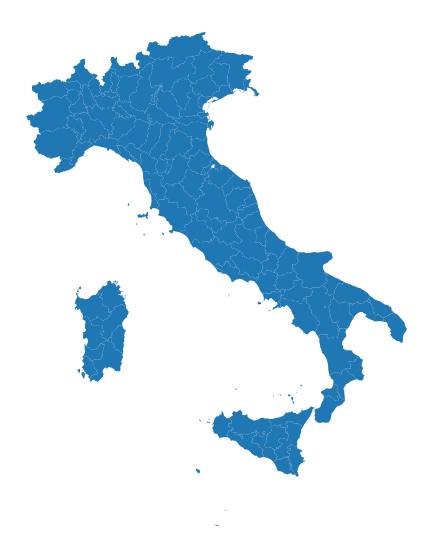

In [174]:
# Store data
provincial_data = gpd.read_file(provinces)

# Visualize GeoDataFrame
provincial_data.plot(figsize=(10, 10), color="tab:blue").set_axis_off()

### Transportation 

#### Roads

Roads that form up a logical transportation network at a map scale 1:1 000 000. Roads can be omitted for cartographic reasons in those areas where the road network is very dense. Low-class roads can be added if these roads are important routes in settlement structure. Roads are represented by one line regardless of the number of lanes or carriageways. Road lines shorter than 2 km are excluded. All European roads (E-roads) are included.

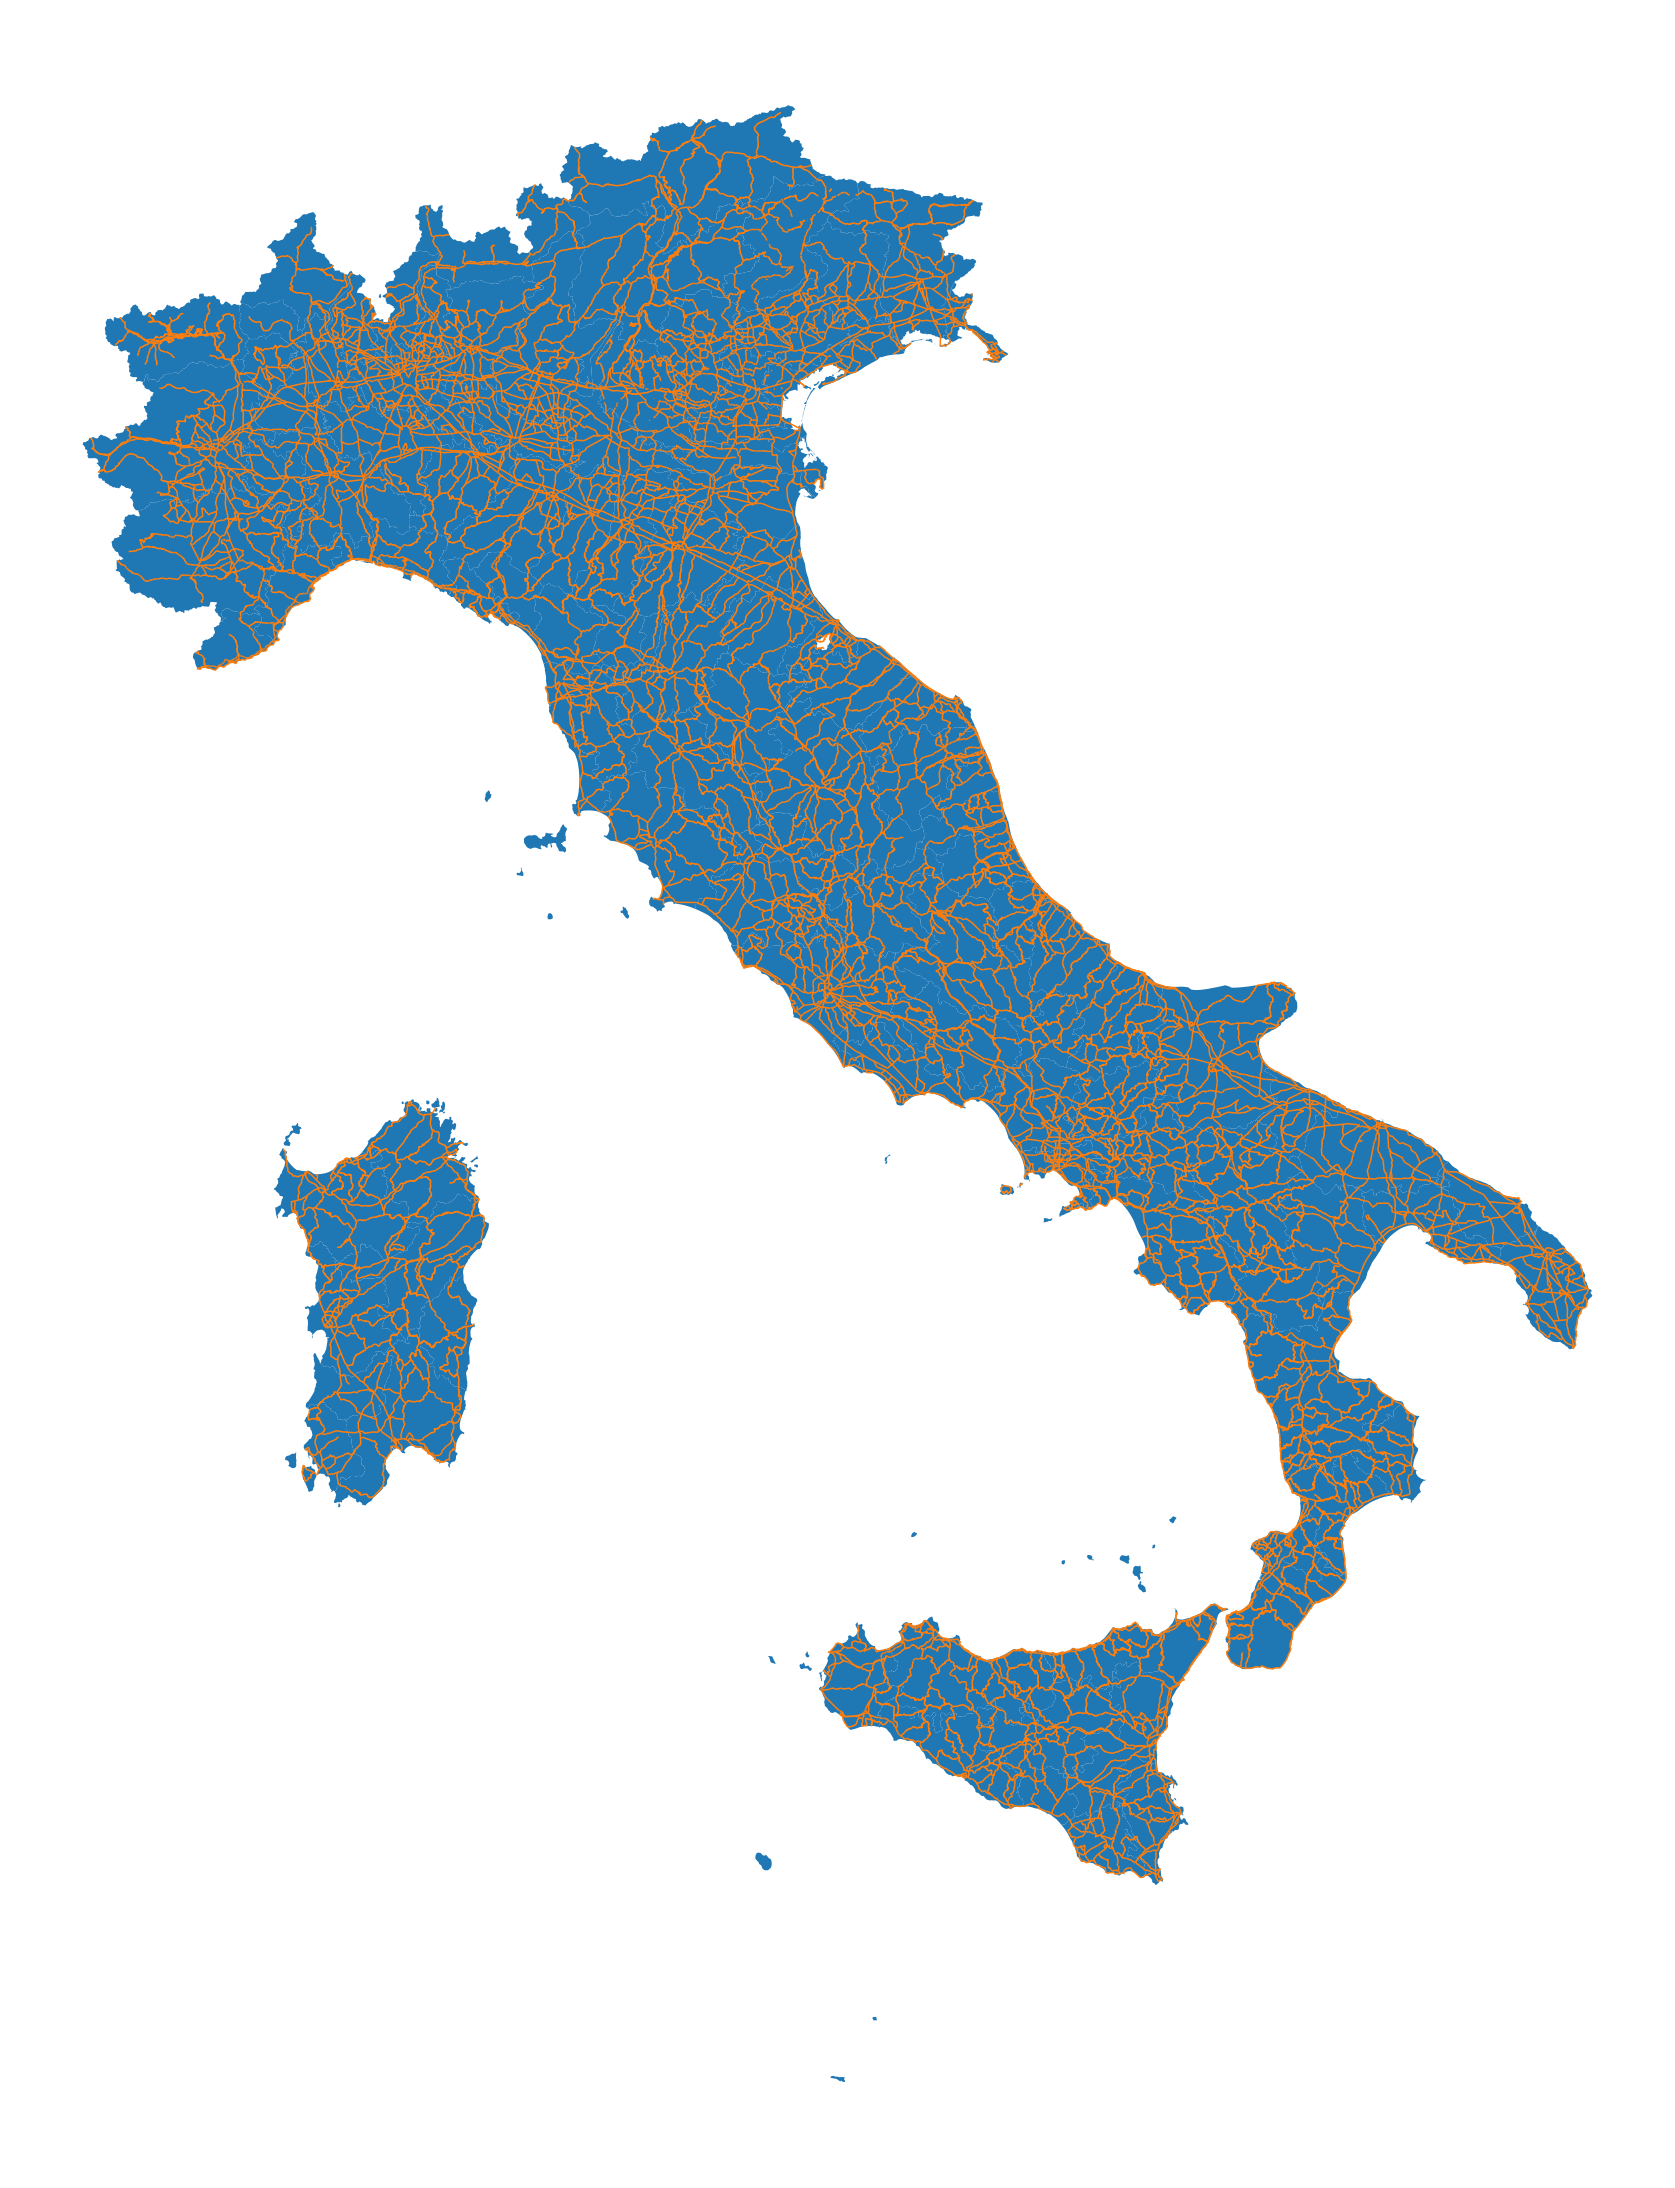

In [175]:
# Store data
road_data = gpd.read_file(roads)

# Visualize GeoDataFrames
ax = provincial_data.plot(figsize=(40, 40),color="tab:blue")
road_data.plot(ax=ax, color="tab:orange").set_axis_off()

In [176]:
road_data

,FCsubtype,inspireId,beginLifes,F_CODE,ICC,COR,EXS,LLE,LTN,MED,...,RST,RSU,RTE,RTN,RTT,TEN,TOL,TUC,SHAPE_Leng,geometry
0,1,_EG.EGM.RoadL:cbae3b43-44b2-421b-889a-db060159...,2018-08-02,AP030,IT,1,28,1,4,1,...,1,1,E76,A11,16,1,2,7,0.098188,"LINESTRING (10.93782 43.91144, 10.91115 43.914..."
1,1,_EG.EGM.RoadL:e4e381ab-7d8f-46c1-82dd-40224359...,2018-08-02,AP030,IT,999,28,1,2,2,...,1,1,N_A,UNK,14,1,1,7,0.002906,"LINESTRING (7.38169 45.74427, 7.38337 45.74190)"
2,1,_EG.EGM.RoadL:227270cb-d6c9-484e-8dc9-17be69f7...,2018-08-02,AP030,IT,1,28,1,4,1,...,1,1,E35/E45,A1,16,1,2,7,0.014619,"LINESTRING (10.85715 44.66182, 10.85908 44.659..."
3,1,_EG.EGM.RoadL:62d53a4f-8566-4f4f-bbf7-eb514d29...,2018-08-02,AP030,IT,2,28,2,2,2,...,1,1,N_A,UNK,15,0,1,7,0.004208,"LINESTRING (8.85657 44.41738, 8.86042 44.41614..."
4,1,_EG.EGM.RoadL:73ef2f03-b4c5-4118-95a5-c6787cde...,2018-08-02,AP030,IT,999,28,1,2,2,...,1,1,N_A,UNK,14,0,1,7,0.002497,"LINESTRING (7.55234 45.74320, 7.54984 45.74303)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32132,1,_EG.EGM.RoadL:da86cc12-cb23-41b9-a938-bef7fffd...,2017-09-13,AP030,IT,1,28,2,4,1,...,1,1,E45,A3,16,1,2,7,0.004815,"LINESTRING (14.43324 40.76538, 14.43782 40.76390)"
32133,1,_EG.EGM.RoadL:ab6eed98-6d9a-45e3-ae94-36c9f846...,2017-09-13,AP030,IT,999,28,2,2,2,...,1,1,E90,SS106,14,1,1,7,0.001989,"LINESTRING (17.10885 39.35020, 17.10829 39.34829)"
32134,1,_EG.EGM.RoadL:60c7f4c3-d6ca-4bc6-b23d-cef3966c...,2017-09-13,AP030,IT,1,28,2,4,1,...,1,1,E90,A19,16,1,2,7,0.002193,"LINESTRING (13.65778 37.98519, 13.65627 37.98678)"
32135,1,_EG.EGM.RoadL:d7bc8804-ee81-4d71-99f8-11326399...,2017-09-13,AP030,IT,1,28,1,4,1,...,1,1,E717,A6,16,1,2,7,0.004762,"LINESTRING (7.78987 44.53521, 7.79229 44.53111)"


In [199]:
provincial_data[provincial_data.NUTS_LABEL == 'Torino']

,inspireId,beginLifes,ICC,NUTS_CODE,NUTS_LABEL,TAA,Shape_Leng,Shape_Area,geometry
21,_EG.EGM.NUTS3:ed2882bd-ba86-4356-ae84-cb23aae1...,2019-02-07,IT,ITC11,Torino,2,6.078369,0.781409,"POLYGON ((7.86058 45.59702, 7.88054 45.59991, ..."


In [200]:
provincial_data[provincial_data.NUTS_LABEL == 'Asti']

,inspireId,beginLifes,ICC,NUTS_CODE,NUTS_LABEL,TAA,Shape_Leng,Shape_Area,geometry
135,_EG.EGM.NUTS3:e07e6211-6aca-470c-b10c-790c383a...,2019-02-07,IT,ITC17,Asti,2,3.519765,0.172165,"POLYGON ((8.03507 45.12877, 8.04599 45.12860, ..."


In [201]:
len(road_data[road_data.intersects(provincial_data.geometry[21]) & road_data.intersects(provincial_data.geometry[135])].geometry)

7

In [195]:
len(road_data[road_data.crosses(provincial_data.geometry[21])]) == len(road_data[road_data.crosses(provincial_data.geometry[21])].geometry.intersects(provincial_data.geometry[21]))
#proof: "crosses" stronger than "intersects"
# crossing lines are liekly to be misleading
# opportunity idea.

True

In [47]:
for
path = nx.path_graph(0)
if road_data.geometry[90].intersects(provincial_data.geometry[0]) == True:
    print(True)

In [62]:
list1= [i for i in range(10)]
list2 = [i for i in range(20)]

In [63]:
p = nx.path_graph(list1)
q = nx.path_graph(list2)

In [64]:
print(p.nodes)
print(q.nodes)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


In [65]:
print(p.edges)
print(q.edges)

[(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9)]
[(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9), (9, 10), (10, 11), (11, 12), (12, 13), (13, 14), (14, 15), (15, 16), (16, 17), (17, 18), (18, 19)]


In [67]:
g = nx.compose(p,q)

In [69]:
g.nodes == q.nodes

True

In [70]:
g.edges == q.edges

True

In [ ]:
road_graph = nx.Graph()
for road_line in road_data.geometry
    edgelist = []
    path = nx.path_graph(path)
    provinces = [province for province in ]
    for province_area in provincial_data.geometry:
        if road_line.intersects(province_area)==True:
            province_node = province_area.centroid
            
            edgelist.append(edge)
    
    road_graph = nx.compose(road_graph, path)
    

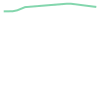

In [88]:
road_data.geometry[0]

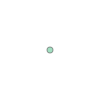

In [75]:
provincial_data.geometry[0].centroid

In [81]:
a = nx.path_graph([])

In [82]:
a.add_edges_from([(0,1), (2,3), (1,2)])

In [84]:
a.nodes

NodeView((0, 1, 2, 3))

In [85]:
a.edges

EdgeView([(0, 1), (1, 2), (2, 3)])

In [121]:
line = road_data.geometry[2]

In [125]:
#for line in road_data.geometry:
province = provincial_data.geometry[16]
provincial_data[provincial_data.intersects(line)].geometry # or .crosses

84    POLYGON ((14.25496 42.44456, 14.26120 42.44013...
Name: geometry, dtype: geometry

In [137]:
road_data[road_data.intersects(province)].geometry # or .crosses

/opt/anaconda3/lib/python3.8/site-packages/geopandas/base.py:39: UserWarning: The indices of the two GeoSeries are different.
  warn("The indices of the two GeoSeries are different.")


GeoSeries([], Name: geometry, dtype: geometry)

In [135]:
provs = "/Users/Pit/GitHub/DigitalEpidemiologyProject/Data/Shapefiles/ProvCM01012020/ProvCM01012020_WGS84.shp"
# Store data
prov_data = gpd.read_file(provs)

In [136]:
prov_data.

,COD_RIP,COD_REG,COD_PROV,COD_CM,COD_UTS,DEN_PROV,DEN_CM,DEN_UTS,SIGLA,TIPO_UTS,SHAPE_AREA,SHAPE_LEN,geometry
0,1,1,1,201,201,-,Torino,Torino,TO,Citta metropolitana,6.826908e+09,593389.667001,"POLYGON ((411015.006 5049970.983, 411070.006 5..."
1,1,1,2,0,2,Vercelli,-,Vercelli,VC,Provincia,2.081602e+09,458754.449021,"POLYGON ((437900.552 5088796.204, 437915.021 5..."
2,1,1,3,0,3,Novara,-,Novara,NO,Provincia,1.340250e+09,276722.284585,"POLYGON ((459146.367 5079451.275, 459180.648 5..."
3,1,1,4,0,4,Cuneo,-,Cuneo,CN,Provincia,6.894828e+09,542063.983810,"MULTIPOLYGON (((418682.124 4967085.107, 418717..."
4,1,1,5,0,5,Asti,-,Asti,AT,Provincia,1.510170e+09,356521.052241,"POLYGON ((423634.299 4998152.373, 423642.986 4..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,1,1,103,0,103,Verbano-Cusio-Ossola,-,Verbano-Cusio-Ossola,VB,Provincia,2.260887e+09,316521.773202,"POLYGON ((456874.626 5145767.794, 456879.627 5..."
103,1,3,108,0,108,Monza e della Brianza,-,Monza e della Brianza,MB,Provincia,4.054079e+08,164691.454327,"POLYGON ((519686.705 5065270.380, 519754.706 5..."
104,3,11,109,0,109,Fermo,-,Fermo,FM,Provincia,8.627532e+08,226568.225869,"POLYGON ((885062.265 4803844.694, 885197.764 4..."
105,4,16,110,0,110,Barletta-Andria-Trani,-,Barletta-Andria-Trani,BT,Provincia,1.542926e+09,275814.149356,"POLYGON ((1081237.144 4611047.023, 1081399.393..."


In [ ]:
# PSEUDOCODE
for province in provinces :
    others = [prov for prov in provinces if prov != province]
    for other in others:
        if road_data.geometry[90].intersects(provincial_data.geometry[0]) == True: